<a href="https://colab.research.google.com/github/Omer-sync/InventDataAnalytics.Cowork/blob/main/InventData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Invent Analitics: Sales Data Analysis

## Importing Libraries

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

df_train = pd.read_csv("/content/drive/MyDrive/dac22-invent-analytics-project/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/dac22-invent-analytics-project/test.csv")
df_holiday = pd.read_csv("/content/drive/MyDrive/dac22-invent-analytics-project/holidays.csv")
df_product = pd.read_csv("/content/drive/MyDrive/dac22-invent-analytics-project/product.csv")

In [12]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()
df_holiday_copy = df_holiday.copy()
df_product_copy = df_product.copy()

## Understanding and Cleaning Data

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405292 entries, 0 to 405291
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              405292 non-null  int64  
 1   date            405292 non-null  object 
 2   product_id      405292 non-null  int64  
 3   price           404730 non-null  float64
 4   discount        405292 non-null  float64
 5   season_type     405292 non-null  object 
 6   sales_amount    405292 non-null  float64
 7   on_promotion    405292 non-null  int64  
 8   promotion_type  386922 non-null  object 
 9   store_count     405292 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 30.9+ MB


1. Change NaN in promotion_type to "noPromotion"


In [14]:
df_train_copy['promotion_type'] = df_train_copy['promotion_type'].fillna("noPromotion")

In [15]:
#temp_df = df_train_copy[df_train_copy["price"].isnull()]

In [16]:
#null_product_id_list = []
#for i in temp_df["product_id"].unique():
#  null_product_id_list.append(i)

In [17]:
#for product_id in null_product_id_list:
#  temp_df = df_train_copy[df_train_copy["product_id"] == product_id]
#  temp_price=temp_df[~(temp_df["price"].isnull())].iloc[0].price
#  temp_discount =temp_df[~(temp_df["price"].isnull())].iloc[0].discount
#  temp_original_price = temp_price / (1-temp_discount)


In [18]:
#temp_df = df_train_copy[df_train_copy["product_id"] == 486]

In [19]:
#temp_price=temp_df[~(temp_df["price"].isnull())].iloc[0].price
#temp_discount =temp_df[~(temp_df["price"].isnull())].iloc[0].discount

In [24]:
df_train_copy= df_train_copy[df_train_copy['price'].notna()]
df_train_copy

,id,date,product_id,price,discount,season_type,sales_amount,on_promotion,promotion_type,store_count
0,1,2018-08-06,21,221.47,0.0,Autumn-Winter,83.0,1,Main Promo 3,85
1,2,2018-08-13,21,221.47,0.0,Autumn-Winter,100.0,1,Main Promo 3,85
2,3,2018-08-20,21,221.47,0.0,Autumn-Winter,127.0,1,Main Promo 3,85
3,4,2018-08-27,21,221.47,0.0,Autumn-Winter,89.0,1,Main Promo 3,84
4,5,2018-09-03,21,221.47,0.0,Autumn-Winter,124.0,1,Main Promo 3,85
...,...,...,...,...,...,...,...,...,...,...
405287,405288,2020-10-26,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,17
405288,405289,2020-11-02,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,15
405289,405290,2020-11-09,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,13
405290,405291,2020-11-16,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,10


In [25]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404730 entries, 0 to 405291
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              404730 non-null  int64  
 1   date            404730 non-null  object 
 2   product_id      404730 non-null  int64  
 3   price           404730 non-null  float64
 4   discount        404730 non-null  float64
 5   season_type     404730 non-null  object 
 6   sales_amount    404730 non-null  float64
 7   on_promotion    404730 non-null  int64  
 8   promotion_type  404730 non-null  object 
 9   store_count     404730 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 34.0+ MB


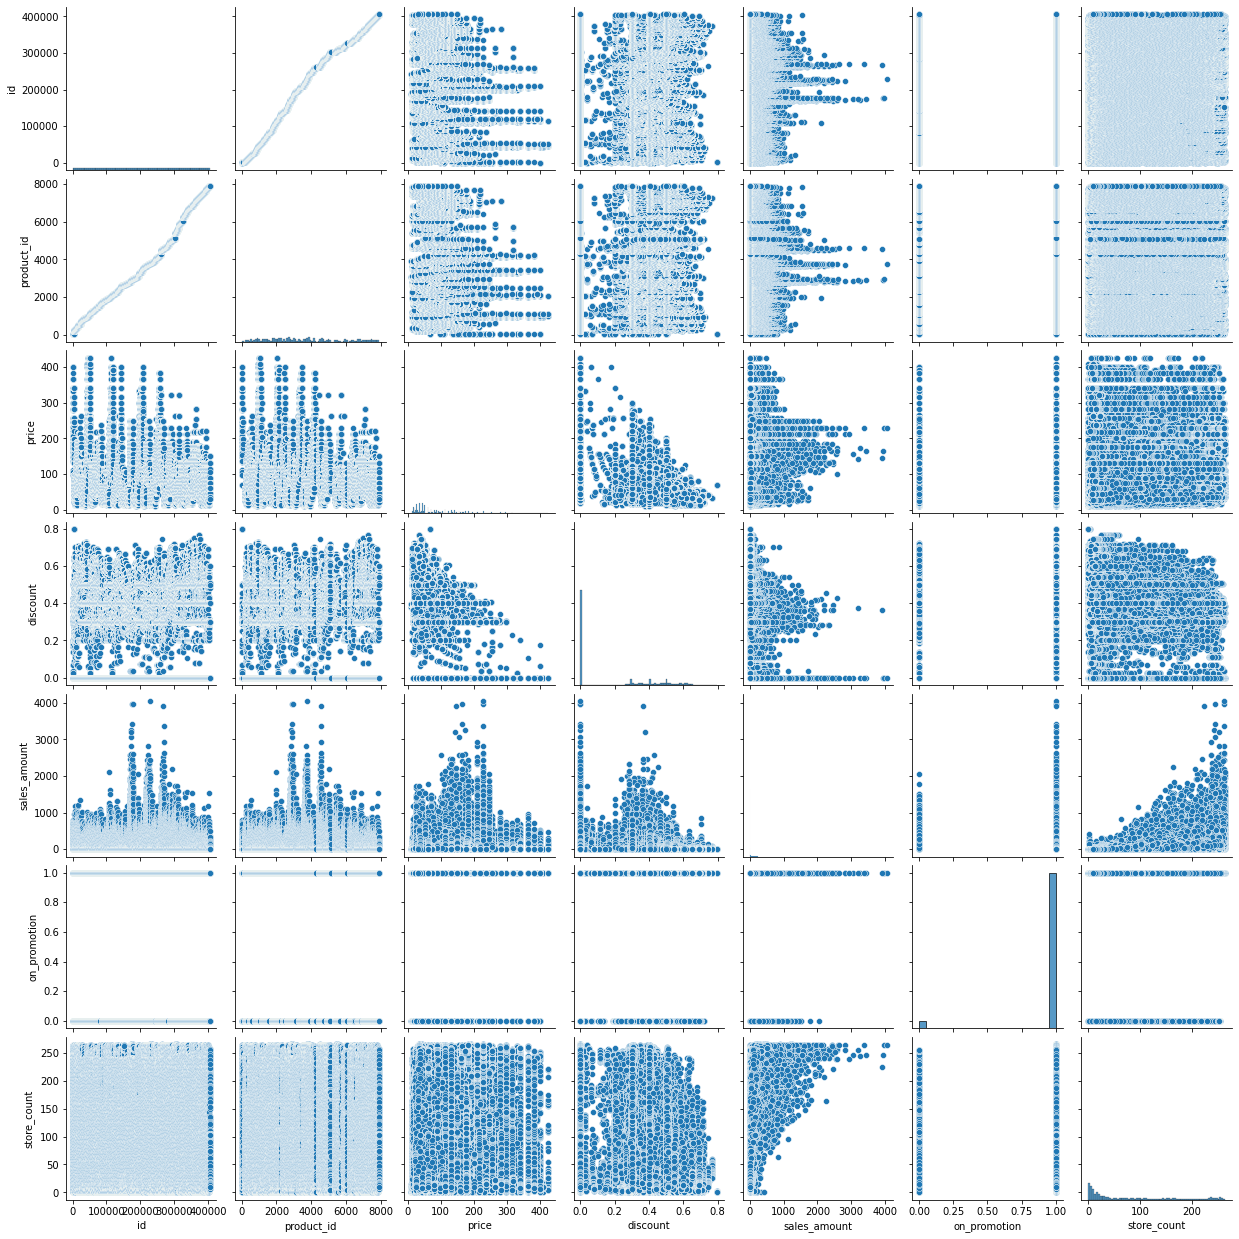

In [27]:
print(sns.pairplot(df_train_copy))

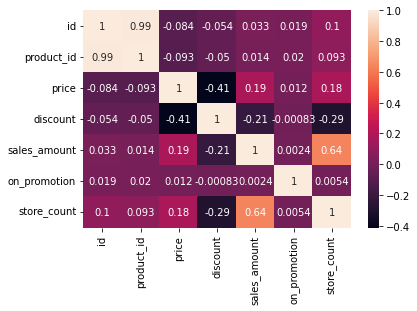

In [28]:
sns.heatmap(df_train_copy.corr() , annot = True)

In [32]:
sales_by_promo = df_train_copy.groupby("promotion_type")["sales_amount"].mean()

In [33]:
sales_by_promo

promotion_type
BlackFriday                         50.646810
Genaral Promo- No label discount    71.935738
Main Promo 1                        68.871927
Main Promo 2                        85.351837
Main Promo 3                        57.255456
Season Middle Promo 1               56.155068
Season Middle Promo 2               74.926441
noPromotion                         64.725204
Name: sales_amount, dtype: float64